Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

##Rozpoznawanie cyfr - zbiór **MNIST**

Pobranie danych

In [3]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


Wybrane informacje o zbiorze

In [4]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000,))

In [6]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
train_labels[0]

5

Kodowanie one-hot

In [8]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [9]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000, 10))

In [10]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000, 10))

In [11]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Wizualizacja

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


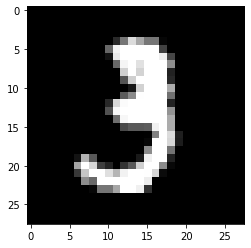

In [12]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)
    
img_index = 10
plot_image(img_index)

In [13]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [14]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 128, use_bias=True, activation = "relu"))
model.add(Dense(units = 64, use_bias=True, activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = tf.keras.optimizers.Adam(learning_rate=0.002)
#opt = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________


In [15]:
batch_size = 128
epochs = 10

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 7ms/step - loss: 1.7522 - accuracy: 0.8389 - val_loss: 0.3376 - val_accuracy: 0.9143
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2780 - accuracy: 0.9272 - val_loss: 0.2641 - val_accuracy: 0.9295
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1960 - accuracy: 0.9444 - val_loss: 0.2251 - val_accuracy: 0.9427
Epoch 4/10
375/375 [==============================] - 2s 7ms/step - loss: 0.1519 - accuracy: 0.9566 - val_loss: 0.1978 - val_accuracy: 0.9461
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1347 - accuracy: 0.9605 - val_loss: 0.1781 - val_accuracy: 0.9550
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1120 - accuracy: 0.9670 - val_loss: 0.1842 - val_accuracy: 0.9502
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1086 - accuracy: 0.9681 - val_loss: 0.1943 - val_accuracy: 0.9508
Epoch 

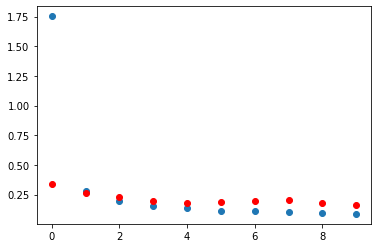

In [16]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

In [17]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1703936904668808
Test accuracy: 0.960099995136261


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 69ms/step


array([[2.2774202e-15, 5.3581234e-10, 3.9536769e-09, 9.9999952e-01,
        8.4330068e-20, 2.5596490e-08, 1.1180695e-20, 2.8880257e-15,
        8.2625057e-08, 3.8702055e-07]], dtype=float32)

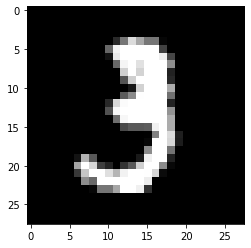

In [18]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)
    
img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)